<a href="https://colab.research.google.com/github/Anshul007/Analysis_in_Clustering/blob/main/Feature_Extraction_for_effective_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

[here](https://github.com/royjafari/DataAnalyticsForFun/blob/main/FeatureExtraction%2BClustering/Feature%20Extraction%20%2B%20Clustering%20-%20E.ipynb)

In [1]:
# Basics libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 0)
# pd.set_option("display.max_rows")

# for plotting the data
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use("seaborn-deep")
plt.rcParams["figure.figsize"] = (20,10)
# plt.figure(figsize=(20,10))

import seaborn as sns
sns.set_style("whitegrid")

# handling warnings
import warnings
warnings.filterwarnings("ignore")

# preprocessing
from sklearn.preprocessing import MinMaxScaler


# Loading dataset

In [2]:
data_url = "https://raw.githubusercontent.com/royjafari/DataAnalyticsForFun/main/FeatureExtraction%2BClustering/WH%20Report_preprocessed.csv"
df = pd.read_csv(data_url)
df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


# Pre-processing 

In [3]:
df.nunique()

Name                                 122
Continent                              7
year                                  10
population                          1220
Life_Ladder                         1045
Log_GDP_per_capita                  1011
Social_support                       408
Healthy_life_expectancy_at_birth     564
Freedom_to_make_life_choices         482
Generosity                           542
Perceptions_of_corruption            521
Positive_affect                      409
Negative_affect                      351
dtype: int64

In [4]:
df.isnull().sum()

Name                                0
Continent                           0
year                                0
population                          0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           0
Positive_affect                     0
Negative_affect                     0
dtype: int64

In [5]:
df.describe()

,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,2014.500000,5.311917e+07,5.529730,9.431966,0.815538,64.185311,0.760881,0.002459,0.732184,0.714270,0.270481
std,2.873459,1.733131e+08,1.152958,1.162152,0.119089,7.148290,0.136890,0.166349,0.192968,0.108795,0.082849
min,2010.000000,3.180410e+05,2.375000,6.885000,0.303000,32.300000,0.304000,-0.335000,0.047000,0.322000,0.095000
25%,2012.000000,5.560886e+06,4.658250,8.526000,0.753750,59.475000,0.671750,-0.114250,0.676000,0.628000,0.207750
50%,2014.500000,1.134228e+07,5.489500,9.564000,0.842000,65.830000,0.782500,-0.025000,0.792000,0.726000,0.262500
75%,2017.000000,3.634024e+07,6.382500,10.426750,0.909000,69.120000,0.873500,0.094250,0.861000,0.806000,0.322000
max,2019.000000,1.397715e+09,7.858000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.591000


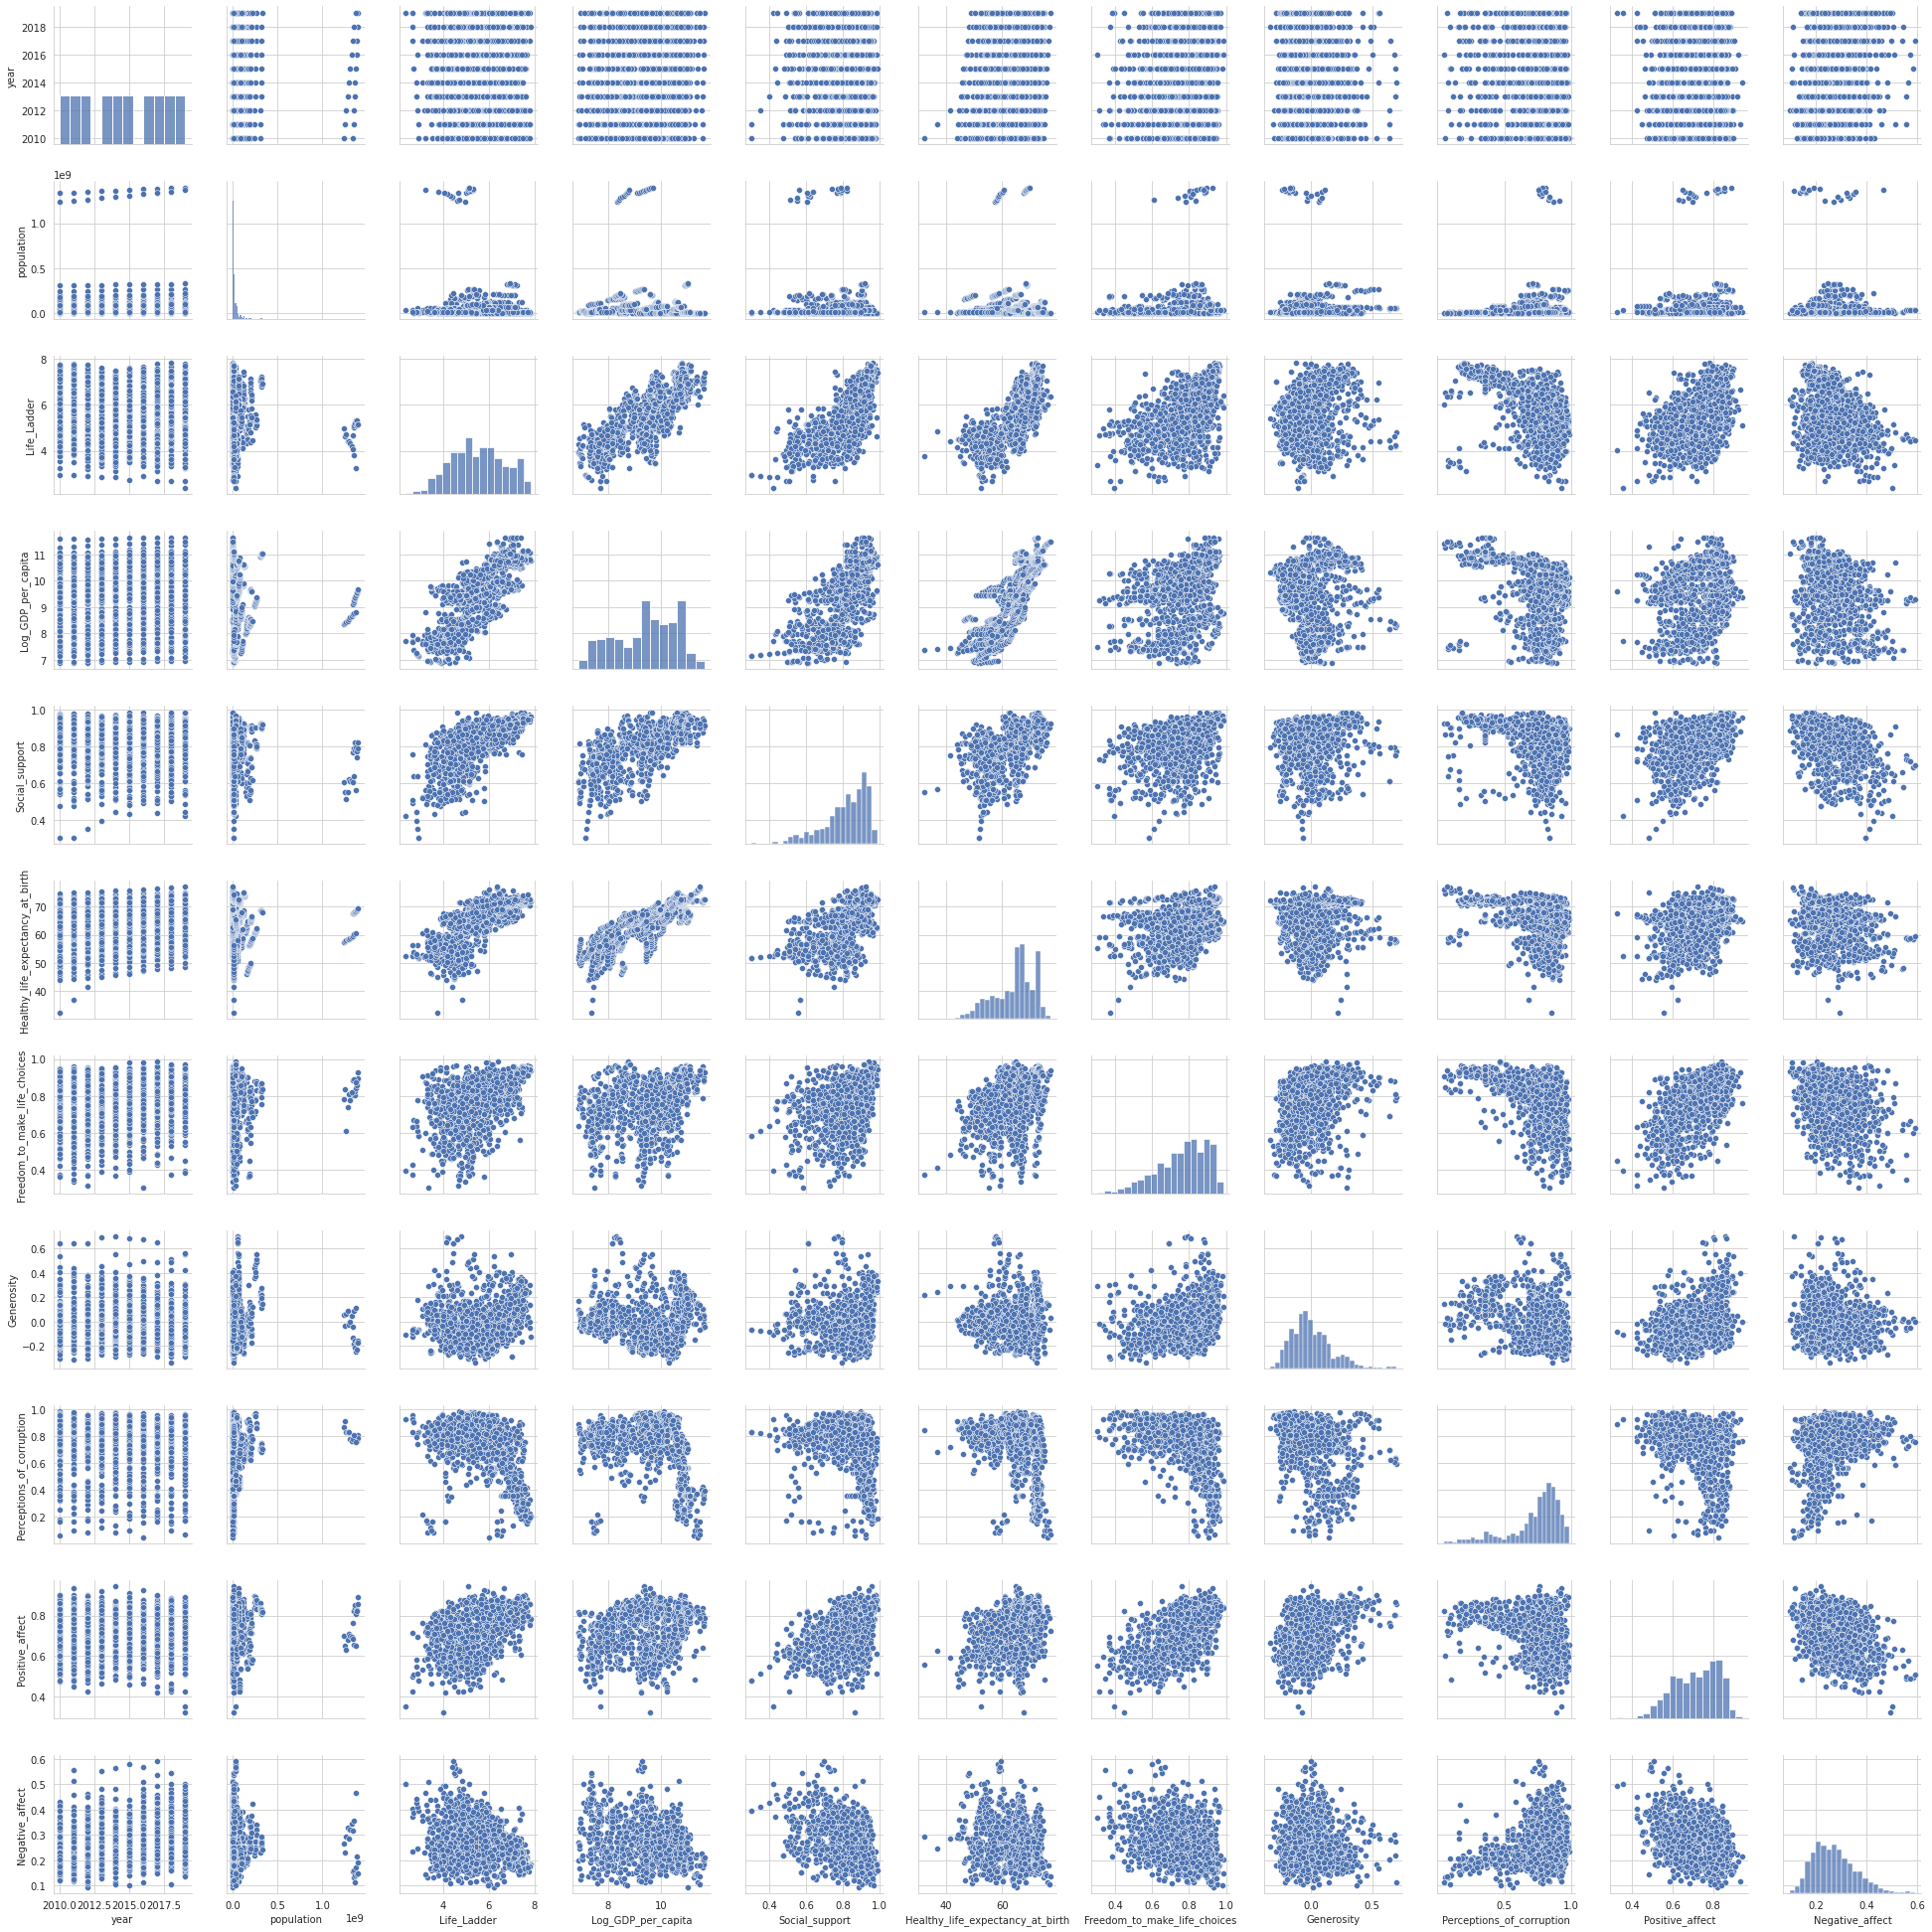

In [6]:
# checking the correlation
sns.pairplot(df)
plt.show()

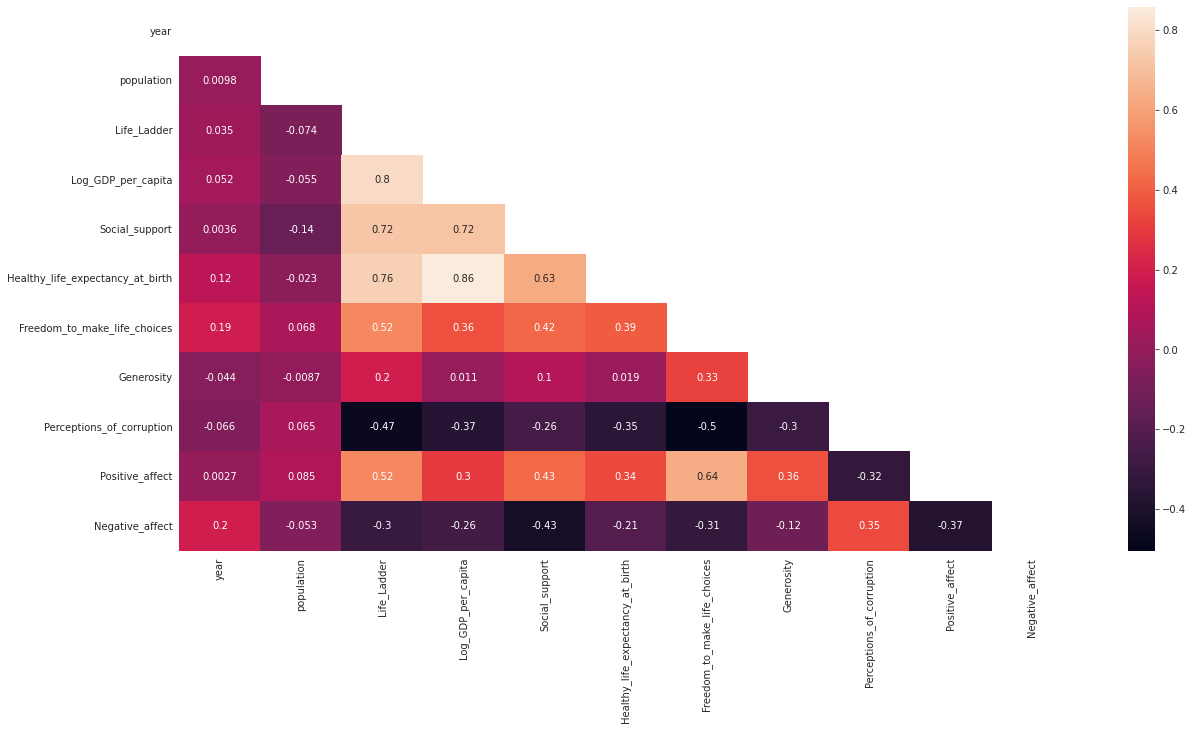

In [7]:
corr = df.corr()
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask= mask, annot= True)
plt.show()

In [8]:
df.columns

Index(['Name', 'Continent', 'year', 'population', 'Life_Ladder',
       'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
       'Negative_affect'],
      dtype='object')

In [9]:
# creating the pivot table
df.pivot(index= ['Name', 'Continent'],
         columns= ["year"],
         values= ['population', 'Life_Ladder','Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'])

population              ... Negative_affect       
year                             2010        2011  ...            2018   2019
Name        Continent                              ...                       
Afghanistan Asia           29185507.0  30117413.0  ...           0.405  0.502
Albania     Europe          2913021.0   2905195.0  ...           0.319  0.274
Algeria     Africa         35977455.0  36661444.0  ...           0.293  0.215
Argentina   South America  40788453.0  41261490.0  ...           0.321  0.319
Armenia     Europe          2877319.0   2876538.0  ...           0.455  0.430
...                               ...         ...  ...             ...    ...
Uruguay     South America   3359275.0   3368934.0  ...           0.275  0.222
Uzbekistan  Asia           28562400.0  29339400.0  ...           0.209  0.220
Vietnam     Asia           87967651.0  88871561.0  ...           0.191  0.186
Zambia      Africa         13605984.0  14023193.0  ...           0.351  0.394
Zimbabwe    Africa         12697723.0  12894316.0  ...           0.212  0.235

[122 rows x 100 columns]

In [10]:
# saving into another one
df = df.pivot(index= ['Name', 'Continent'],
              columns= ["year"],
              values= ['population', 'Life_Ladder','Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth',
                       'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'])
df.head()

population              ... Negative_affect       
year                             2010        2011  ...            2018   2019
Name        Continent                              ...                       
Afghanistan Asia           29185507.0  30117413.0  ...           0.405  0.502
Albania     Europe          2913021.0   2905195.0  ...           0.319  0.274
Algeria     Africa         35977455.0  36661444.0  ...           0.293  0.215
Argentina   South America  40788453.0  41261490.0  ...           0.321  0.319
Armenia     Europe          2877319.0   2876538.0  ...           0.455  0.430

[5 rows x 100 columns]

In [11]:
data = df.drop(columns= ["population"])
data.head()

Life_Ladder                ... Negative_affect              
year                             2010   2011   2012  ...            2017   2018   2019
Name        Continent                                ...                              
Afghanistan Asia                4.758  3.832  3.783  ...           0.371  0.405  0.502
Albania     Europe              5.269  5.867  5.510  ...           0.334  0.319  0.274
Algeria     Africa              5.464  5.317  5.605  ...           0.289  0.293  0.215
Argentina   South America       6.441  6.776  6.468  ...           0.292  0.321  0.319
Armenia     Europe              4.368  4.260  4.320  ...           0.437  0.455  0.430

[5 rows x 90 columns]

In [12]:
data.shape

(122, 90)

In [13]:
trans_df = MinMaxScaler().fit_transform(data)
trans_df

array([[0.37644628, 0.18466612, 0.18047479, ..., 0.503386  , 0.6819222 ,
        1.        ],
       [0.48202479, 0.60408079, 0.53492509, ..., 0.41986456, 0.48512586,
        0.37362637],
       [0.52231405, 0.49072547, 0.55442293, ..., 0.31828442, 0.42562929,
        0.21153846],
       ...,
       [0.48760331, 0.58347073, 0.5400561 , ..., 0.13318284, 0.19221968,
        0.13186813],
       [0.42623967, 0.42518549, 0.43292057, ..., 0.53950339, 0.5583524 ,
        0.7032967 ],
       [0.3607438 , 0.3936521 , 0.42101662, ..., 0.17155756, 0.2402746 ,
        0.26648352]])

In [14]:
trans_df.shape

(122, 90)

In [15]:
trans_df = pd.DataFrame(trans_df,
                    index= data.index,
                    columns= data.columns)
trans_df

Life_Ladder            ... Negative_affect          
year                             2010      2011  ...            2018      2019
Name        Continent                            ...                          
Afghanistan Asia             0.376446  0.184666  ...        0.681922  1.000000
Albania     Europe           0.482025  0.604081  ...        0.485126  0.373626
Algeria     Africa           0.522314  0.490725  ...        0.425629  0.211538
Argentina   South America    0.724174  0.791426  ...        0.489703  0.497253
Armenia     Europe           0.295868  0.272877  ...        0.796339  0.802198
...                               ...       ...  ...             ...       ...
Uruguay     South America    0.645868  0.745672  ...        0.384439  0.230769
Uzbekistan  Asia             0.446074  0.577700  ...        0.233410  0.225275
Vietnam     Asia             0.487603  0.583471  ...        0.192220  0.131868
Zambia      Africa           0.426240  0.425185  ...        0.558352  0.703297
Zimbabwe    Africa           0.360744  0.393652  ...        0.240275  0.266484

[122 rows x 90 columns]

In [16]:
trans_df.describe()

Life_Ladder                          ... Negative_affect                        
year         2010        2011        2012  ...            2017        2018        2019
count  122.000000  122.000000  122.000000  ...      122.000000  122.000000  122.000000
mean     0.528748    0.537943    0.529963  ...        0.313640    0.421409    0.414227
std      0.244817    0.233737    0.236889  ...        0.189732    0.200086    0.245573
min      0.000000    0.000000    0.000000  ...        0.000000    0.000000    0.000000
25%      0.334659    0.374279    0.344103  ...        0.172122    0.248284    0.226648
50%      0.524690    0.496393    0.505370  ...        0.291196    0.401602    0.372253
75%      0.711312    0.739489    0.702299  ...        0.400113    0.571510    0.600962
max      1.000000    1.000000    1.000000  ...        1.000000    1.000000    1.000000

[8 rows x 90 columns]

# Cluster Validation
## Hopkins Clustering

In [17]:
def hopkins(df,m):
    from sklearn.neighbors import NearestNeighbors
    from random import sample
    from pandas import DataFrame
    from numpy import random

    d = len(df.columns) # columns
    n = len(df) # rows
    
    df = (df - df.min())/(df.max()-df.min()) *2 -1
    df = df / df.std()
    

    knn = NearestNeighbors(n_neighbors=2).fit(df)

    rand_df = DataFrame(random.rand(m,d),index = range(0,m),columns =df.columns )
    rand_df = rand_df*2-1
    rand_df = rand_df * df.abs().max()

    ujd = []
    wjd = []

    for j in range(0, m):
        u_dist, _ = knn.kneighbors([rand_df.iloc[j]])
        ujd.append(u_dist[0][0])

        w_dist, _ = knn.kneighbors(df.sample(1))
        wjd.append(w_dist[0][1])

    return(sum(ujd) / (sum(ujd) + sum(wjd)))

In [18]:
m = 10
hopkins(trans_df, m)

0.7192263491075347

## Cluster Comparison

In [19]:
def countpairs(Clustering1,Clustering2):
    from pandas import Series
    
    output = Series(0,index=['N00','N01','N10','N11'])

    for i in range(0,10):
        for j in range(0,i):
            if(i!=j):

                c1_same = False
                c2_same = False
                c1_Not_same = False
                c2_Not_same = False

                if(Clustering1[i]==Clustering1[j]):
                    c1_same=True
                else:
                    c1_Not_same=True
                if(Clustering2[i]==Clustering2[j]):
                    c2_same=True
                else:
                    c2_Not_same = True

                if(c1_same & c2_same):
                    output.N11 = output.N11 +1 
                if(c1_Not_same & c2_Not_same):
                    output.N00 = output.N00 +1
                if(c1_same & c2_Not_same):
                    output.N10 = output.N10 +1
                if(c1_Not_same & c2_same):
                    output.N01 = output.N01 +1

    return(output)

## Fowlkes–Mallows

In [20]:
def fowlkes_mallows(Clustering1,Clustering2):
    
    from numpy import sqrt
    from pandas import Series
    
    p = countpairs(Clustering1,Clustering2)
    
    return(p.N11/((p.N11+p.N01)+(p.N11+p.N10)))

## Measuring the consistency

In [21]:
from sklearn.cluster import KMeans

In [22]:
for itr in range(0, 10):
  kmeans = KMeans(n_clusters= 7)
  clustering1 = kmeans.fit(trans_df).labels_
  clustering2 = kmeans.fit(trans_df).labels_
  print(f"fowlkes_mallows in {itr} is : {fowlkes_mallows(clustering1,clustering2)}")

fowlkes_mallows in 0 is : 0.5
fowlkes_mallows in 1 is : 0.3333333333333333
fowlkes_mallows in 2 is : 0.2222222222222222
fowlkes_mallows in 3 is : 0.3333333333333333
fowlkes_mallows in 4 is : 0.5
fowlkes_mallows in 5 is : 0.5
fowlkes_mallows in 6 is : 0.36363636363636365
fowlkes_mallows in 7 is : 0.5
fowlkes_mallows in 8 is : 0.25
fowlkes_mallows in 9 is : 0.4


# Finding the k (# of cluster)

## Method 1: Using Sum of Squared Error(SSE)

In [23]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0, index = range(2,15), 
                       columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(trans_df)
        # Inertia: Sum of distances of samples to their closest cluster center
        SSE_results.at[n_cluster,col] = algort.inertia_ 

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
14,143.714952,144.935221,146.548724,145.765715,145.071412,146.984994,146.727877,144.477748,145.996005,145.580294,1.225671
13,149.590270,148.146777,149.027569,150.169177,150.532138,150.003295,148.828475,149.256298,146.701062,149.139451,1.375424
12,152.893780,154.800433,155.473220,154.786623,152.572068,155.626637,151.033524,154.059492,154.519834,153.973957,2.300768
11,159.342594,160.569486,158.605184,158.685448,156.721922,159.929006,159.108847,156.707168,157.468513,158.570908,1.855683
10,165.764028,165.315859,165.135889,162.955031,165.287500,167.381919,163.464936,163.483889,163.330225,164.679919,2.145146
9,169.561339,171.363351,170.321922,169.740528,172.052287,171.797685,168.907714,171.572155,174.472113,171.087677,2.835356
8,179.680133,177.090498,179.097875,177.169773,180.117031,177.086302,177.512201,177.067746,177.044803,177.985151,1.609846
7,184.730793,185.730356,184.910179,186.248710,186.084694,185.077363,185.966812,185.876622,185.910203,185.615081,0.310315
6,195.263783,194.851345,193.233252,193.307589,193.222223,195.084363,195.073663,194.590056,193.426576,194.228094,0.816442
5,208.215820,208.192363,208.406261,208.197978,208.345564,208.862040,208.491804,208.406261,208.215820,208.370434,0.046107


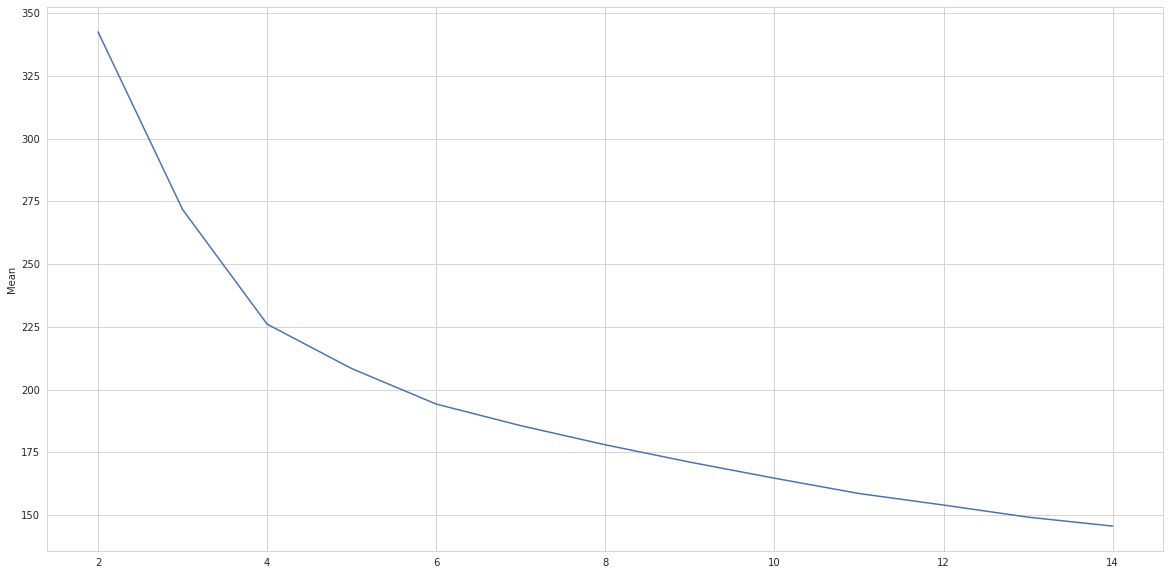

In [24]:
sns.lineplot(x= SSE_results.index, y= SSE_results.Mean)
plt.show()

> at k=4, there is something. let's validate from another one is Silhouette score.
## Method 2: Using Silhouette Score

---
> `Silhouette` this will not only check intra-distance but also inter-distance.<br>
This will be more precise compare to SSE

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SIL_results = pd.DataFrame(0.0, index = range(2,15), 
                       columns= repetitions)


for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(trans_df)
        SIL_results.at[n_cluster,col] = silhouette_score(X= trans_df, labels= algort.labels_) 

SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
SIL_results.sort_values(["Mean"], ascending= True)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
13,0.137046,0.128379,0.135285,0.159895,0.159520,0.160959,0.121263,0.145058,0.167359,0.146085,2.717545e-04
14,0.137319,0.161295,0.149142,0.145802,0.145144,0.153391,0.142898,0.151489,0.155017,0.149055,5.145011e-05
12,0.146277,0.163728,0.148900,0.157074,0.146992,0.142833,0.170677,0.145631,0.128131,0.150027,1.548562e-04
11,0.168122,0.153906,0.183035,0.154853,0.170226,0.156382,0.178022,0.173079,0.159955,0.166398,1.131692e-04
9,0.172883,0.166713,0.163117,0.169550,0.159566,0.178187,0.181861,0.161966,0.155857,0.167745,7.525893e-05
10,0.170740,0.182027,0.182544,0.178330,0.172341,0.177983,0.172497,0.155828,0.170969,0.173696,6.578134e-05
8,0.172833,0.183064,0.181354,0.180886,0.176025,0.183731,0.178969,0.202869,0.174545,0.181586,7.803049e-05
7,0.177063,0.183870,0.194908,0.179785,0.178342,0.176002,0.183351,0.206011,0.189479,0.185423,9.719355e-05
6,0.198643,0.200051,0.199492,0.208345,0.202301,0.198436,0.199194,0.202974,0.200145,0.201065,9.849540e-06
5,0.230920,0.220229,0.229328,0.228192,0.230534,0.230920,0.222384,0.230920,0.218092,0.226835,2.646163e-05


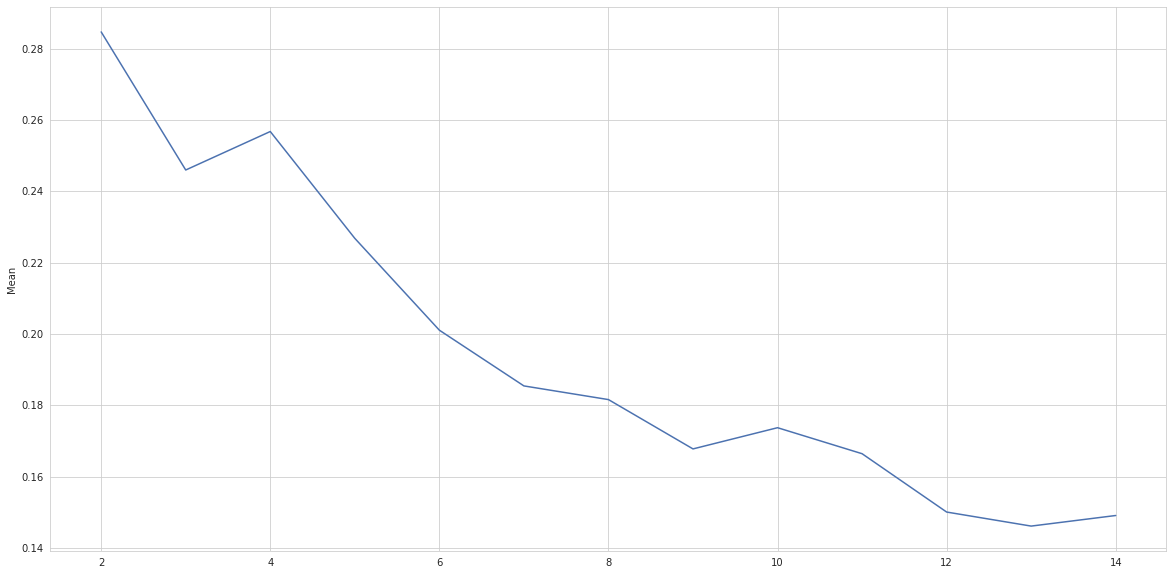

In [27]:
# plotting the silhouette score
sns.lineplot(x= SIL_results.index, y= SIL_results.Mean)
plt.show()

# Running the Model
> Now we know from both the methods, that the suitable number of cluster is 4. <br>so let's run!!!!!

In [28]:
kmeans = KMeans(n_clusters= 4).fit(trans_df)
memb = pd.Series(data= kmeans.labels_, index= trans_df.index)
memb

Name         Continent    
Afghanistan  Asia             3
Albania      Europe           0
Algeria      Africa           0
Argentina    South America    1
Armenia      Europe           0
                             ..
Uruguay      South America    1
Uzbekistan   Asia             1
Vietnam      Asia             1
Zambia       Africa           3
Zimbabwe     Africa           3
Length: 122, dtype: int32

# Centroid Analysis

In [29]:
clusters = ['Cluster {}'.format(i) for i in range(4)]
Centroids_orig = pd.DataFrame(0.0, index = clusters, columns = data.columns) # without preprocessing

Centroids_std = pd.DataFrame(0.0, index =  clusters, columns = trans_df.columns) # after preprocessing
for cluster in range(4):
    BM = memb==cluster # for every cluster
    Centroids_orig.iloc[cluster] = data[BM].median(axis=0) # this is for us
    Centroids_std.iloc[cluster] = trans_df[BM].mean(axis=0) # this is for heatmap
    
Centroids_orig

Life_Ladder                         ... Negative_affect                       
year             2010   2011    2012    2013  ...            2016   2017    2018    2019
Cluster 0      5.0615  5.084  5.1105  5.0780  ...           0.301  0.301  0.2915  0.2655
Cluster 1      5.8765  5.789  5.9475  5.9495  ...           0.282  0.278  0.2825  0.2730
Cluster 2      7.3030  7.354  7.2500  7.3640  ...           0.208  0.196  0.2060  0.2050
Cluster 3      4.2560  4.434  4.3130  4.1280  ...           0.325  0.354  0.3590  0.3580

[4 rows x 90 columns]

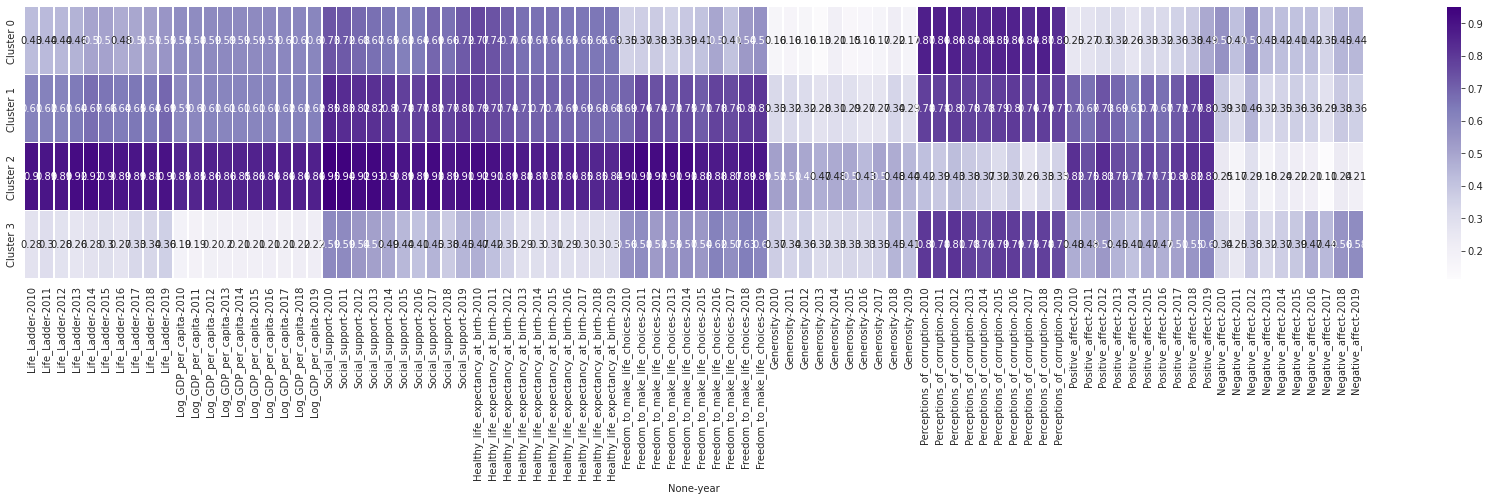

In [30]:
plt.figure(figsize= (30,5))
sns.heatmap(Centroids_std, linewidth= 0.5, annot= True, cmap= "Purples")
plt.show()

In [31]:
replace_dic = {2:'unhappy but generous',
               3:'generously happy but crime-ridden',
               0:'happy but crime-ridden',
               1:'Very happy'}
data['Cluster_noPreprocess'] = memb.replace(replace_dic)
data

Life_Ladder  ...               Cluster_noPreprocess
year                             2010  ...                                   
Name        Continent                  ...                                   
Afghanistan Asia                4.758  ...  generously happy but crime-ridden
Albania     Europe              5.269  ...             happy but crime-ridden
Algeria     Africa              5.464  ...             happy but crime-ridden
Argentina   South America       6.441  ...                         Very happy
Armenia     Europe              4.368  ...             happy but crime-ridden
...                               ...  ...                                ...
Uruguay     South America       6.062  ...                         Very happy
Uzbekistan  Asia                5.095  ...                         Very happy
Vietnam     Asia                5.296  ...                         Very happy
Zambia      Africa              4.999  ...  generously happy but crime-ridden
Zimbabwe    Africa              4.682  ...  generously happy but crime-ridden

[122 rows x 91 columns]

# ------------------------------------------------------------------------------------------------------------------------------------

> Let's do PCA on standarize data and then apply the clustering algorithm.
# Principle Component Analysis [PCA] Transformation

> we need to pass the transformed data, cause if we fail to do then PCA results will deviated/shifted towards the variance.


```
High varience data willl dominates the PCA results.
```



In [32]:
from sklearn.decomposition import PCA

In [33]:
pcs = PCA() 
pcs.fit(trans_df) # this is the transformed data

PCA()

In [34]:
trans_df.shape

(122, 90)

> Creating the summary statistics for the PCA

In [35]:
pcaSumStats_df = pd.DataFrame({"Standard Deviation": np.sqrt(pcs.explained_variance_),
                               "Proportion of Variance": pcs.explained_variance_ratio_,
                               "Cumulative Proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcaSumStats_df.head()

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,1.493286,0.510215,0.510215
1,0.825684,0.155989,0.666204
2,0.566210,0.073354,0.739558
3,0.483642,0.053520,0.793078
4,0.432496,0.042799,0.835877


In [36]:
print(pcaSumStats_df.shape)
pcaSumStats_df = pcaSumStats_df.transpose() # transposing the rows to column
pcaSumStats_df.columns = [f"PCA_{i}" for i in range(1, len(pcaSumStats_df.columns)+1)] # changing the columns name
pcaSumStats_df.head()

(90, 3)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,...,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60,PCA_61,PCA_62,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,PCA_71,PCA_72,PCA_73,PCA_74,PCA_75,PCA_76,PCA_77,PCA_78,PCA_79,PCA_80,PCA_81,PCA_82,PCA_83,PCA_84,PCA_85,PCA_86,PCA_87,PCA_88,PCA_89,PCA_90
Standard Deviation,1.493286,0.825684,0.566210,0.483642,0.432496,0.335784,0.320524,0.261401,0.246720,0.225516,0.175737,0.166080,0.145288,0.141493,0.131317,0.120496,0.119486,0.112963,0.108857,0.102562,0.100933,0.097405,0.091075,0.087192,0.082252,0.078109,0.077083,0.076140,0.074402,0.070547,0.067782,0.065754,0.064603,0.063214,0.058979,0.058356,0.056224,0.054637,0.052961,0.051612,...,0.037324,0.034828,0.033851,0.033131,0.031762,0.030323,0.029249,0.027842,0.026796,0.026322,0.025128,0.023773,0.023098,0.022135,0.021665,0.021487,0.020056,0.018384,0.016951,0.016853,0.016140,0.014445,0.013309,0.011838,0.009852,0.008506,0.005684,0.002509,1.905220e-03,1.603770e-03,1.405554e-03,1.269793e-03,8.486287e-04,6.848273e-04,5.280249e-04,4.656252e-04,1.723733e-05,3.598025e-16,1.300381e-16,1.174629e-16
Proportion of Variance,0.510215,0.155989,0.073354,0.053520,0.042799,0.025798,0.023506,0.015634,0.013928,0.011636,0.007066,0.006311,0.004830,0.004581,0.003946,0.003322,0.003267,0.002920,0.002711,0.002407,0.002331,0.002171,0.001898,0.001739,0.001548,0.001396,0.001360,0.001326,0.001267,0.001139,0.001051,0.000989,0.000955,0.000914,0.000796,0.000779,0.000723,0.000683,0.000642,0.000610,...,0.000319,0.000278,0.000262,0.000251,0.000231,0.000210,0.000196,0.000177,0.000164,0.000159,0.000144,0.000129,0.000122,0.000112,0.000107,0.000106,0.000092,0.000077,0.000066,0.000065,0.000060,0.000048,0.000041,0.000032,0.000022,0.000017,0.000007,0.000001,8.305346e-07,5.885067e-07,4.520253e-07,3.689208e-07,1.647794e-07,1.073074e-07,6.379347e-08,4.960670e-08,6.798408e-11,2.962073e-32,3.869086e-33,3.156958e-33
Cumulative Proportion,0.510215,0.666204,0.739558,0.793078,0.835877,0.861675,0.885181,0.900816,0.914743,0.926380,0.933446,0.939757,0.944587,0.949168,0.953114,0.956436,0.959702,0.962622,0.965333,0.967740,0.970071,0.972242,0.974140,0.975879,0.977427,0.978823,0.980183,0.981509,0.982776,0.983915,0.984966,0.985955,0.986910,0.987824,0.988620,0.989399,0.990123,0.990806,0.991447,0.992057,...,0.996821,0.997098,0.997360,0.997612,0.997842,0.998053,0.998249,0.998426,0.998590,0.998749,0.998893,0.999023,0.999145,0.999257,0.999364,0.999470,0.999562,0.999639,0.999705,0.999770,0.999829,0.999877,0.999918,0.999950,0.999972,0.999989,0.999996,0.999997,9.999982e-01,9.999988e-01,9.999992e-01,9.999996e-01,9.999998e-01,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Here we can conclude few things:
1. `Proportion of Variance` are explaining the how much variance could explain each Principle components.
  * i.e. PCA_1 can explain 50$\%$ of the variance.
2. `Cumulative Proportion` is the cumulative sum, which will explain till how much we explained so far.
  * i.e. till PCA_8, we will be able to explain 90$\%$ of the variance.
  

In [37]:
# let's calculate the score
scores = pd.DataFrame(data= pcs.transform(trans_df),
                      index= trans_df.index,
                      columns= [f"PC_{i}" for i in range(1, len(trans_df.columns)+1)])
# taking till PC_8 column
scores = scores[[f'PC_{i}' for i in range(1, 9)]]
scores

,,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
Name,Continent,,,,,,,,
Afghanistan,Asia,3.173343,0.052823,0.654224,0.342582,0.312978,-0.466334,0.581484,0.756543
Albania,Europe,0.735896,-0.658929,0.022357,0.210337,-0.270205,-0.609919,-0.081000,0.074101
Algeria,Africa,0.617760,-0.951909,0.651677,-0.479958,0.257080,-0.066001,0.712933,-0.109118
Argentina,South America,-0.941771,-0.293904,-0.836980,-0.119844,-0.547135,0.070215,0.429072,0.060456
Armenia,Europe,1.419031,-1.470173,0.396780,0.689785,-0.382149,-0.068230,-0.104397,-0.535045
...,...,...,...,...,...,...,...,...,...
Uruguay,South America,-1.340533,0.335517,-0.205086,-0.083251,-0.528120,0.127557,0.175131,-0.251470
Uzbekistan,Asia,-1.035982,1.478322,0.110256,-0.592786,0.123812,0.286737,-0.326806,-0.505379
Vietnam,Asia,0.011408,0.140928,-0.032715,-0.406155,-0.177024,-0.087474,-0.897816,-0.103805


### Plotting only 2 components

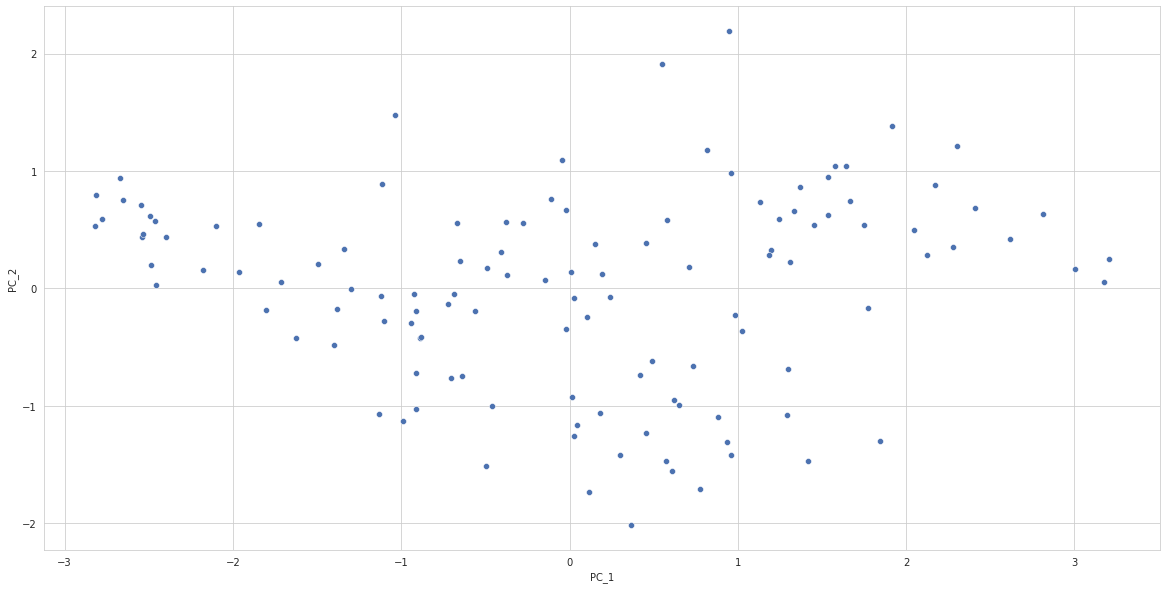

In [38]:
sns.scatterplot(data= scores, x= "PC_1", y= "PC_2", cmap= "viridis")
plt.show()

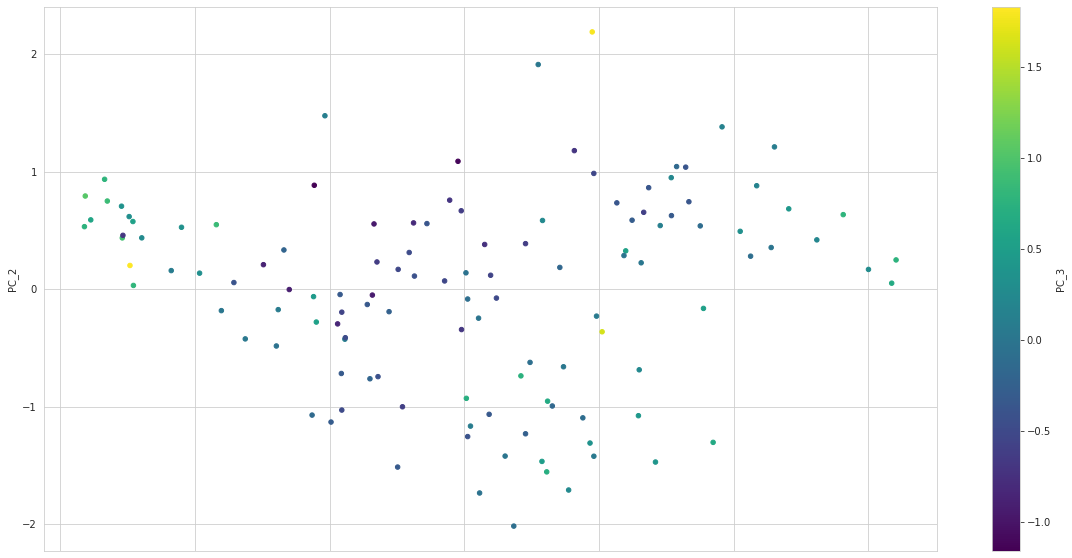

In [39]:
# better visualization
scores.plot.scatter(x= "PC_1", y= "PC_2", c= "PC_3", colormap='viridis')
plt.show()

# Finding Number of cluster

## Using SSE

In [40]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0,
                           index = range(2,15),
                           columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(scores)
        SSE_results.at[n_cluster,col] = algort.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
14,94.339505,96.429859,95.969454,96.912791,96.689233,96.272367,93.689821,96.220959,96.861379,95.931708,1.301390
13,98.908188,100.188880,99.596403,97.540584,99.674208,101.468739,96.030943,95.895798,100.386533,98.854475,3.829991
12,104.559225,102.237201,101.941204,105.576908,104.802234,103.789723,104.583167,104.387055,104.042885,103.991067,1.415536
11,108.802674,111.267489,108.616750,108.303432,107.343407,108.620520,110.090673,107.051336,105.148903,108.360576,3.104860
10,116.981035,116.049389,116.702708,114.850736,115.582420,115.072365,115.616068,115.342198,115.362316,115.728804,0.517397
9,122.710671,119.199202,120.715573,120.286862,121.023416,120.483763,120.225925,119.440197,120.583903,120.518835,1.018427
8,126.432440,127.093815,126.036442,128.045818,128.258776,128.819175,127.557223,128.525710,127.584725,127.594903,0.880253
7,134.064346,136.053177,133.702596,136.259710,134.652722,136.300662,135.022603,133.905041,134.148833,134.901077,1.112867
6,142.904997,144.544103,142.161348,144.133915,144.017971,141.979805,142.000556,141.950906,141.966028,142.851070,1.178550
5,156.843622,156.834046,156.954809,156.816865,156.843622,156.834046,156.834371,156.834371,156.834371,156.847791,0.001670


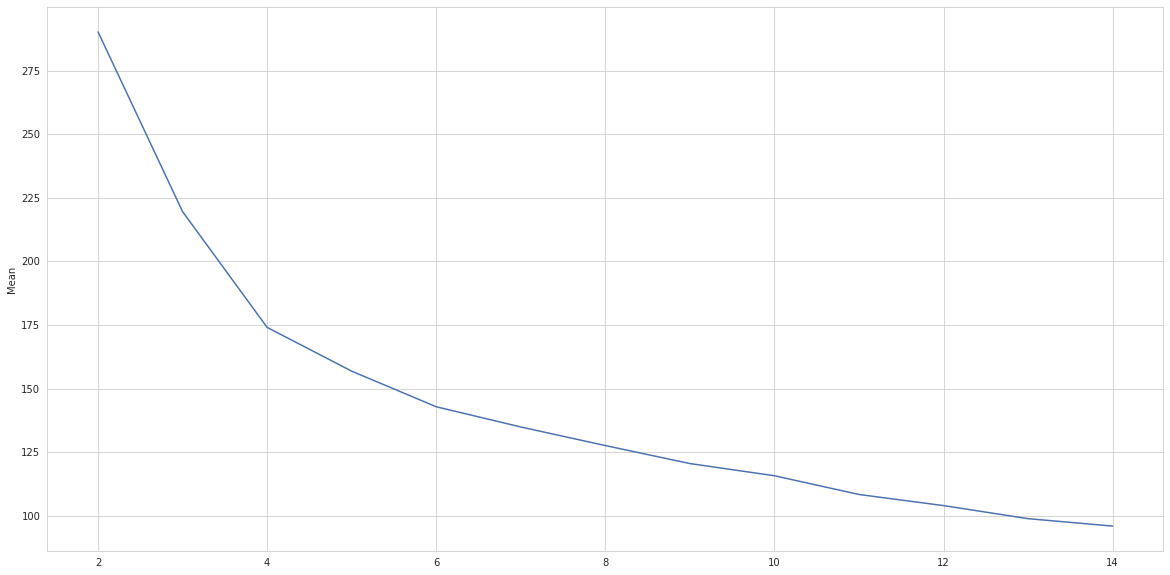

In [41]:
sns.lineplot(data= SSE_results,x= SSE_results.index, y= "Mean")

## Using Silhoutte Scores

In [42]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0,
                           index = range(2,15),
                           columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(scores)
        SSE_results.at[n_cluster,col] = silhouette_score(scores, labels= algort.labels_, ) # Inertia: Sum of distances of samples to their closest cluster center

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)

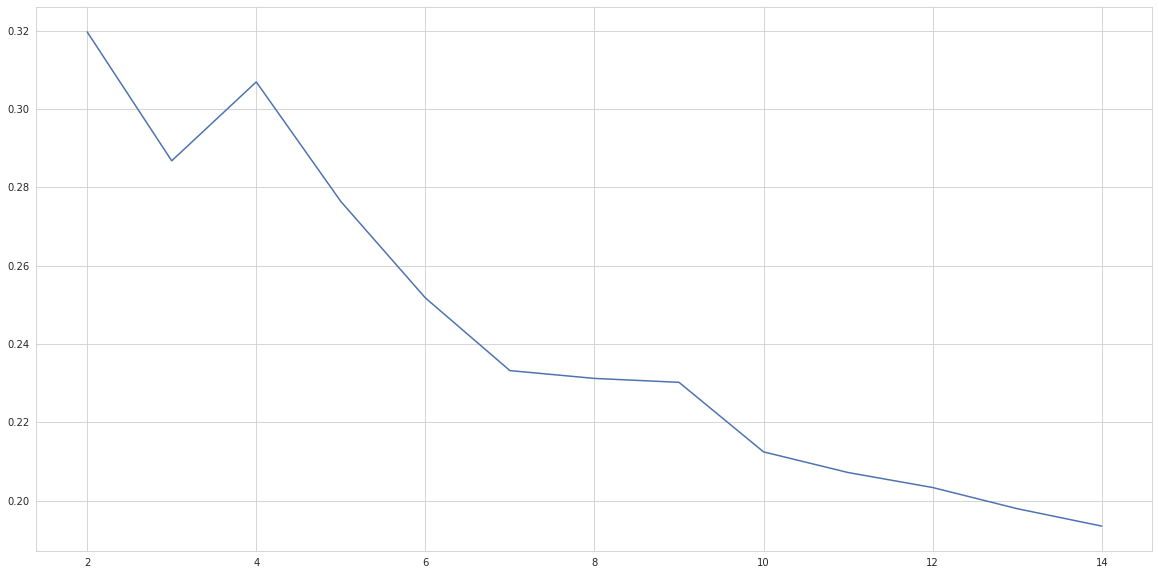

In [43]:
SSE_results.Mean.plot()
plt.show()

> Both the plot shows that the we can go with 4 cluster.

In [44]:
for itr in range(20):
  kmeans = KMeans(n_clusters= 4)

  clustering_1 = kmeans.fit(scores).labels_
  clustering_2 = kmeans.fit(scores).labels_

  print(f'fowlkes_mallows: {fowlkes_mallows(clustering_1,clustering_2)}')


fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5
fowlkes_mallows: 0.5


In [45]:
# after fitting model
memb = pd.Series(kmeans.labels_, index= scores.index)
memb

Name         Continent    
Afghanistan  Asia             1
Albania      Europe           3
Algeria      Africa           3
Argentina    South America    0
Armenia      Europe           3
                             ..
Uruguay      South America    0
Uzbekistan   Asia             0
Vietnam      Asia             0
Zambia       Africa           1
Zimbabwe     Africa           1
Length: 122, dtype: int32

# Cetroid Analaysis

In [46]:
clusters = [f"clust_{i}" for i in range(4)]

centroid_org = pd.DataFrame(0.0, index= clusters, columns= trans_df.columns)
centroid_pca = pd.DataFrame(0.0, index= clusters, columns= scores.columns)

for clust in range(4):
  BM = memb == clust
  centroid_org.iloc[clust] = trans_df[BM].median(axis= 0)
  centroid_pca.iloc[clust] = scores[BM].median(axis= 0)

centroid_org

Life_Ladder                      ... Negative_affect                    
year           2010      2011      2012  ...            2017      2018      2019
clust_0    0.607541  0.588005  0.624718  ...        0.293454  0.401602  0.370879
clust_1    0.272727  0.308739  0.289252  ...        0.465011  0.576659  0.604396
clust_2    0.902273  0.910552  0.892044  ...        0.108352  0.226545  0.184066
clust_3    0.439153  0.442704  0.452932  ...        0.345372  0.422197  0.350275

[4 rows x 90 columns]

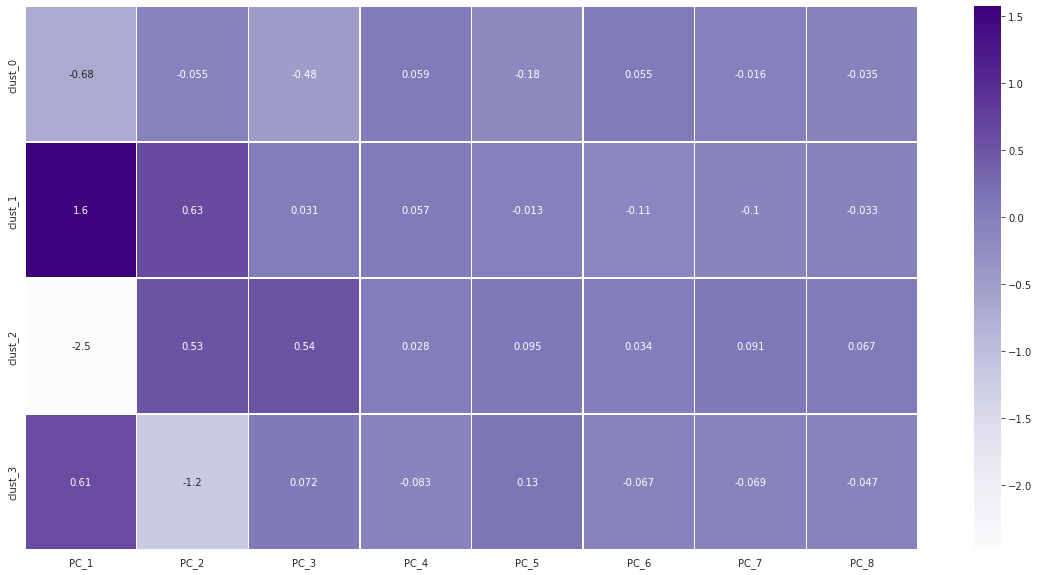

In [47]:
# plotting the heatmap
sns.heatmap(data= centroid_pca, linewidth= 0.5, annot= True, cmap= "Purples")
plt.show()

In [48]:
data.head()

Life_Ladder  ...               Cluster_noPreprocess
year                             2010  ...                                   
Name        Continent                  ...                                   
Afghanistan Asia                4.758  ...  generously happy but crime-ridden
Albania     Europe              5.269  ...             happy but crime-ridden
Algeria     Africa              5.464  ...             happy but crime-ridden
Argentina   South America       6.441  ...                         Very happy
Armenia     Europe              4.368  ...             happy but crime-ridden

[5 rows x 91 columns]

In [49]:
# adding another column after pca
data["Cluster_pca"] = memb
data.round(2).head()

Life_Ladder  ... Cluster_pca
year                             2010  ...            
Name        Continent                  ...            
Afghanistan Asia                 4.76  ...           1
Albania     Europe               5.27  ...           3
Algeria     Africa               5.46  ...           3
Argentina   South America        6.44  ...           0
Armenia     Europe               4.37  ...           3

[5 rows x 92 columns]

## Contigency Table (by calculating crosstab)

In [50]:
data.columns[-2:].tolist() # geting last 2 columns

[('Cluster_noPreprocess', ''), ('Cluster_pca', '')]

In [51]:
contingency_tbl = pd.crosstab(data.Cluster_noPreprocess, data.Cluster_pca)
contingency_tbl

Cluster_pca,0,1,2,3
Cluster_noPreprocess,,,,
Very happy,44,0,0,0
generously happy but crime-ridden,0,33,0,0
happy but crime-ridden,0,0,0,26
unhappy but generous,0,0,19,0


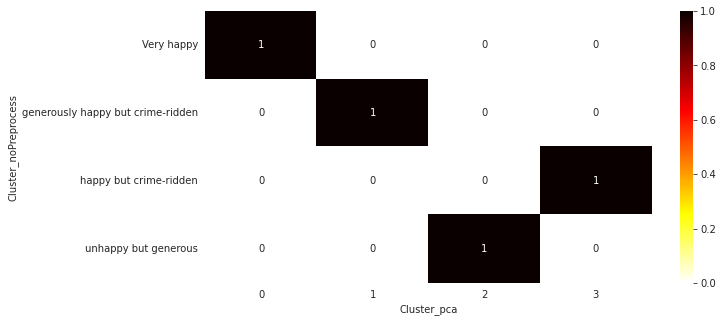

In [52]:
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
plt.figure(figsize= (10,5))
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="hot_r")
plt.show()

# Functional Data Reduction

In [87]:
from sklearn.linear_model import LinearRegression

In [69]:
# Create a placeholder for preprocessing
columns = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
           'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
features = ['Mean','Slope']

my_columns = pd.MultiIndex.from_product([features, columns],
                                        names= ("Features", "Columns"))
preprocessed_df = pd.DataFrame(data= None,
                               index= data.index,
                               columns= my_columns)

temp_df = data.reset_index()
countries = temp_df[temp_df.columns[0]].unique()

preprocessed_df

Features                         Mean  ...           Slope
Columns                   Life_Ladder  ... Negative_affect
Name        Continent                  ...                
Afghanistan Asia                  NaN  ...             NaN
Albania     Europe                NaN  ...             NaN
Algeria     Africa                NaN  ...             NaN
Argentina   South America         NaN  ...             NaN
Armenia     Europe                NaN  ...             NaN
...                               ...  ...             ...
Uruguay     South America         NaN  ...             NaN
Uzbekistan  Asia                  NaN  ...             NaN
Vietnam     Asia                  NaN  ...             NaN
Zambia      Africa                NaN  ...             NaN
Zimbabwe    Africa                NaN  ...             NaN

[122 rows x 18 columns]

In [91]:
for country in countries:
  for column in columns:
    BM = temp_df[temp_df.columns[0]] == country

    wdf = pd.DataFrame(temp_df[BM][column])
    wdf.reset_index(drop= True, inplace= True) # no use of this, in this case
    wdf["Integer"] = range(len(wdf))
    wdf["once"] = 1
    # applying Linear Regression
    # lr = LinearRegression()
    # lm.fit()

    # print(wdf.drop(columns= [column]))
    print(wdf[column])

    break
  break

KeyError: ignored